In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Multilinear Regression

Consider a larger data set to determine which factors best predict prices in a housing market.

In [ ]:
H = np.loadtxt('housing.data')
print(H.shape)

H_dataset = pd.DataFrame(H)
H_dataset.head()

The data contains 13 features and prices for 506 houses.

In [ ]:
A = H[:,:-1] # house features (e.g., property tax rate, per-capita crime rate)
y = H[:,-1]  # housing values in $1000s

It is important to pad this matrix with an additional column of ones, to take into account the possibility of non-zero constant offset in the regression formula. This corresponds to the "y-intercept" in a simple one-dimensional linear regression.

In [ ]:
A = np.pad(A,[(0,0),(0,1)],mode='constant',constant_values=1)

Perform multilinear regression via SVD:

In [ ]:
from numpy.linalg import svd
U, S, Vh = svd(A, full_matrices=False);

D = 1.0/S;
x = (Vh.T * D) @ U.T @ y;
print(x); # minimum norm solution

In [ ]:
plt.plot(y, 'b', label='housing value')
plt.plot(A @ x, 'r', label='best-fit price prediction')
plt.xlabel('neighborhood')
plt.ylabel('median housing value (in $1000s)')
plt.legend()
plt.show()

Sorting data by housing value:

In [ ]:
sort_ind = np.argsort(y)
ys = y[sort_ind] # sorted values
As = A[sort_ind,:];

plt.plot(ys, 'b', label='housing value')
plt.plot(As@x, 'r', label='best-fit price prediction')
plt.xlabel('neighborhood')
plt.ylabel('median housing value (in $1000s)')
plt.legend()
plt.show()

Although the housing value are not perfectly predicted, the trend agrees quite well. It is often the case that the highest value outliers are not well captured by simple linear fits.

# Image Compression

(4000, 3000)


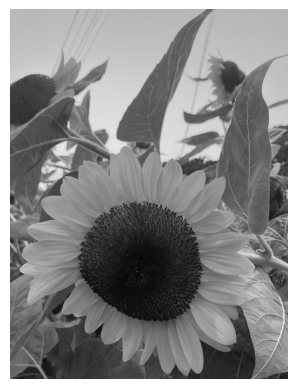

In [3]:
import cv2

Img = cv2.imread('sunflowergray.jpg', cv2.IMREAD_GRAYSCALE);
print(Img.shape)

plt.imshow(Img, cmap = 'gray', vmin = 0, vmax = 255)
plt.axis("off")
plt.show()

In [4]:
from numpy.linalg import svd
U, S, Vh = svd(Img, full_matrices=False)
print(U.shape, S.shape, Vh.shape)

(4000, 3000) (3000,) (3000, 3000)


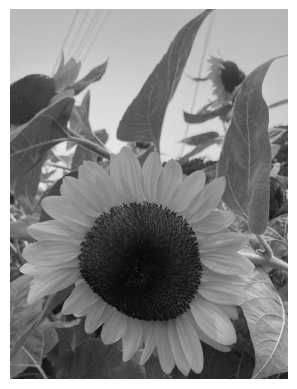

In [7]:
p = 200;

ApproxImg = (U[:,0:p] * S[0:p]) @ Vh[0:p,:]

plt.imshow(ApproxImg, cmap = 'gray', vmin = 0, vmax = 255)
plt.axis("off")
plt.show()

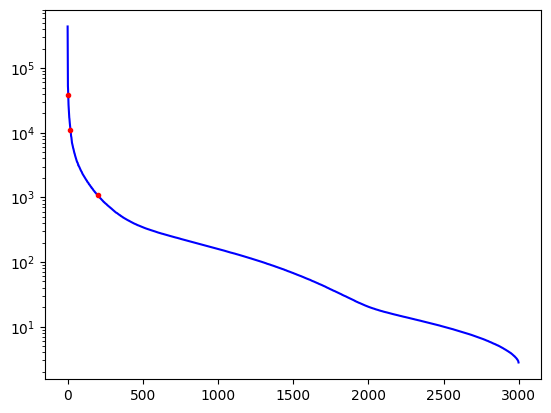

In [8]:
plt.plot(S,'b')
plt.semilogy();

p = np.array([5,20,200]);
for i in p:
  plt.plot(i-1, S[i-1],'r.')

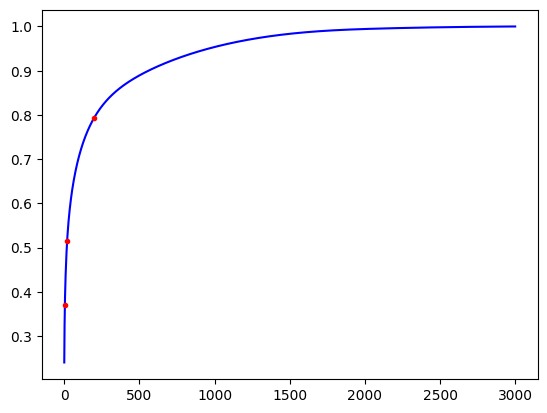

In [9]:
ImgVar = np.cumsum(S)/np.sum(S);
plt.plot(ImgVar, 'b')
for i in p:
  plt.plot(i-1, ImgVar[i-1],'r.')
plt.show()

# Reference

1.   [Brad Nelson (2021), Scientific Computing with Python](https://caam37830.github.io/book/index.html)
2.   [Krishna et al. (2022) Introduction to Data Science with Python](https://nustat.github.io/DataScience_Intro_python/Introduction%20to%20Python%20and%20Jupyter%20Notebooks.html)
3. [Serafina Di Gioia (2024), Python 101, SMR 3935](https://indico.ictp.it/event/10473)
